# TEXT CLUSTERING USING TF-IDF VECTORIZER

In [1]:
#Step 1: Import the libraries
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from tabulate import tabulate
from collections import Counter

In [2]:
#Step 2: Create the documents
dataset = ["I love playing football on the weekends",
 "I enjoy hiking and camping in the mountains",
 "I like to read books and watch movies",
 "I prefer playing video games over sports",
 "I love listening to music and going to concerts"]

In [3]:
#Step 3: Vectorize the dataset
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dataset)

In [4]:
from sklearn.cluster import KMeans
from tabulate import tabulate  # If not already imported
# Make sure you have defined `X`, `dataset`, and `vectorizer` appropriately before this point

# Step 4: Perform clustering
k = 2 # Define the number of clusters
km = KMeans(n_clusters=k)
km.fit(X)

# Predict the clusters for each document
y_pred = km.predict(X)

# Display the document and its predicted cluster in a table
table_data = [["Document", "Predicted Cluster"]]
table_data.extend([[doc, cluster] for doc, cluster in zip(dataset, y_pred)])
print(tabulate(table_data, headers="firstrow"))

# Print top terms per cluster
print("\nTop terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()

#Step 5: Evaluate results
# Calculate purity
total_samples = len(y_pred)
cluster_label_counts = [Counter(y_pred)]
purity = sum(max(cluster.values()) for cluster in cluster_label_counts) / total_samples
print("Purity:", purity)

C:\Users\nikna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Document                                           Predicted Cluster
-----------------------------------------------  -------------------
I love playing football on the weekends                            1
I enjoy hiking and camping in the mountains                        1
I like to read books and watch movies                              0
I prefer playing video games over sports                           1
I love listening to music and going to concerts                    0

Top terms per cluster:
Cluster 0:
 to
 and
 read
 watch
 movies
 like
 books
 concerts
 going
 music

Cluster 1:
 playing
 the
 weekends
 on
 football
 video
 sports
 prefer
 over
 games

Purity: 0.6


# TEXT CLUSTERING USING WORD2VEC VECTORIZER

In [5]:
#Step 1: Import the libraries
import numpy as np
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
from tabulate import tabulate
from collections import Counter

In [6]:
#Step 2: Create the documents
dataset = ["I love playing football on the weekends",
 "I enjoy hiking and camping in the mountains",
 "I like to read books and watch movies",
 "I prefer playing video games over sports",
 "I love listening to music and going to concerts"]

In [7]:
#Step 3: Train Word2Vec model
tokenized_dataset = [doc.split() for doc in dataset]
word2vec_model = Word2Vec(sentences=tokenized_dataset, vector_size=100,
window=5, min_count=1, workers=4)

In [8]:
#Step 4: Create document embeddings
X = np.array([np.mean([word2vec_model.wv[word] for word in doc.split() if word in
word2vec_model.wv], axis=0) for doc in dataset])

In [9]:
#Step 5: Perform clustering
k = 2 # Define the number of clusters
km = KMeans(n_clusters=k)
km.fit(X)
# Predict the clusters for each document
y_pred = km.predict(X)
# Tabulate the document and predicted cluster
table_data = [["Document", "Predicted Cluster"]]
table_data.extend([[doc, cluster] for doc, cluster in zip(dataset, y_pred)])
print(tabulate(table_data, headers="firstrow"))

C:\Users\nikna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nikna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Document                                           Predicted Cluster
-----------------------------------------------  -------------------
I love playing football on the weekends                            1
I enjoy hiking and camping in the mountains                        1
I like to read books and watch movies                              0
I prefer playing video games over sports                           1
I love listening to music and going to concerts                    0


In [10]:
#Step 5: Evaluate results
# Calculate purity
total_samples = len(y_pred)
cluster_label_counts = [Counter(y_pred)]
purity = sum(max(cluster.values()) for cluster in cluster_label_counts) / total_samples
print("Purity:", purity)

Purity: 0.6


# EXERCISE

1. Modify the codes for both TF-IDF & Word2Vec vectorizer by adding text
preprocessing steps.

Do the Purity differ when applying text preprocessing before vectorization?

2. Perform text clustering on 'customer_complaints_1.csv' dataset, specifically the Text
column.

# TF-IDF PreProcessing

In [11]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from tabulate import tabulate
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [12]:
# Sample dataset
dataset = ["I love playing football on the weekends",
           "I enjoy hiking and camping in the mountains",
           "I like to read books and watch movies",
           "I prefer playing video games over sports",
           "I love listening to music and going to concerts"]

In [13]:
# Step 3: Preprocessing
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # Remove non-alphabetic characters and lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text.lower())
    # Tokenize
    tokens = text.split()
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join tokens back into a string
    return ' '.join(tokens)

preprocessed_dataset = [preprocess(doc) for doc in dataset]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nikna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
preprocessed_dataset

['love playing football weekend',
 'enjoy hiking camping mountain',
 'like read book watch movie',
 'prefer playing video game sport',
 'love listening music going concert']

In [15]:
# Vectorize the dataset
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_dataset)

In [16]:
# Define the number of clusters
k = 2

In [17]:
# Create a k-means model and fit it to the data
km = KMeans(n_clusters=k)
km.fit(X)

C:\Users\nikna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [18]:
# Predict the clusters for each document
y_pred = km.predict(X)

In [19]:
# Display the document and its predicted cluster in a table
table_data = [["Document", "Predicted Cluster"]]
table_data.extend([[doc, cluster] for doc, cluster in zip(dataset, y_pred)])
print(tabulate(table_data, headers="firstrow"))

Document                                           Predicted Cluster
-----------------------------------------------  -------------------
I love playing football on the weekends                            0
I enjoy hiking and camping in the mountains                        1
I like to read books and watch movies                              0
I prefer playing video games over sports                           0
I love listening to music and going to concerts                    0


In [20]:
# Print top terms per cluster
print("\nTop terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()


Top terms per cluster:
Cluster 0:
 love
 playing
 football
 weekend
 going
 sport
 music
 concert
 video
 game

Cluster 1:
 camping
 enjoy
 hiking
 mountain
 weekend
 listening
 concert
 football
 game
 going



In [21]:
# Calculate purity
total_samples = len(y_pred)
cluster_label_counts = [Counter(y_pred)]
purity = sum(max(cluster.values()) for cluster in cluster_label_counts) / total_samples

print("Purity:", purity)

Purity: 0.8


# Word2Vec PreProcessing

In [22]:
# Step 1: Import the libraries
import numpy as np
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
from tabulate import tabulate
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Step 2: Create the documents
dataset = ["I love playing football on the weekends",
           "I enjoy hiking and camping in the mountains",
           "I like to read books and watch movies",
           "I prefer playing video games over sports",
           "I love listening to music and going to concerts"]


# Step 3: Preprocessing
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # Remove non-alphabetic characters and lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text.lower())
    # Tokenize
    tokens = text.split()
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join tokens back into a string
    return ' '.join(tokens)

preprocessed_dataset = [preprocess(doc) for doc in dataset]

# Step 3: Train Word2Vec model
tokenized_dataset = [doc.split() for doc in preprocessed_dataset]
word2vec_model = Word2Vec(sentences=tokenized_dataset, vector_size=100, window=5, min_count=1, workers=4)

# Step 4: Create document embeddings
X = np.array([np.mean([word2vec_model.wv[word] for word in doc.split() if word in word2vec_model.wv], axis=0) for doc in dataset])

# Step 5: Perform clustering
k = 2  # Define the number of clusters
km = KMeans(n_clusters=k)
km.fit(X)

# Predict the clusters for each document
y_pred = km.predict(X)

# Tabulate the document and predicted cluster
table_data = [["Document", "Predicted Cluster"]]
table_data.extend([[doc, cluster] for doc, cluster in zip(dataset, y_pred)])
print(tabulate(table_data, headers="firstrow"))

# Calculate purity
total_samples = len(y_pred)
cluster_label_counts = [Counter(y_pred)]
purity = sum(max(cluster.values()) for cluster in cluster_label_counts) / total_samples

print("Purity:", purity)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nikna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\nikna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nikna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Document                                           Predicted Cluster
-----------------------------------------------  -------------------
I love playing football on the weekends                            0
I enjoy hiking and camping in the mountains                        1
I like to read books and watch movies                              1
I prefer playing video games over sports                           0
I love listening to music and going to concerts                    1
Purity: 0.6


# text clustering on 'customer_complaints_1.csv

In [23]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from tabulate import tabulate
from collections import Counter
import pandas as pd

In [24]:
# Load the data again
df = pd.read_csv('customer_complaints_1.csv')

In [25]:
# Vectorize the dataset
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])

In [26]:
# Define the number of clusters
k = 3

In [27]:
# Create a k-means model and fit it to the data
km = KMeans(n_clusters=k)
km.fit(X)

C:\Users\nikna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [28]:
# Predict the clusters for each document
y_pred = km.predict(X)

In [29]:
# Display the document and its predicted cluster in a table
table_data = [["Document", "Predicted Cluster"]]
table_data.extend([[doc, cluster] for doc, cluster in zip(df['text'], y_pred)])
print(tabulate(table_data, headers="firstrow"))

Document                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [30]:
# Print top terms per cluster
print("\nTop terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()


Top terms per cluster:
Cluster 0:
 you
 the
 to
 they
 is
 and
 it
 that
 for
 but

Cluster 1:
 the
 and
 to
 for
 internet
 my
 was
 it
 that
 out

Cluster 2:
 rude
 on
 to
 day
 my
 service
 was
 rep
 with
 me



In [31]:
# Calculate purity
total_samples = len(y_pred)
cluster_label_counts = [Counter(y_pred)]
purity = sum(max(cluster.values()) for cluster in cluster_label_counts) / total_samples

print("Purity:", purity)

Purity: 0.5263157894736842


IndexError: list index out of range

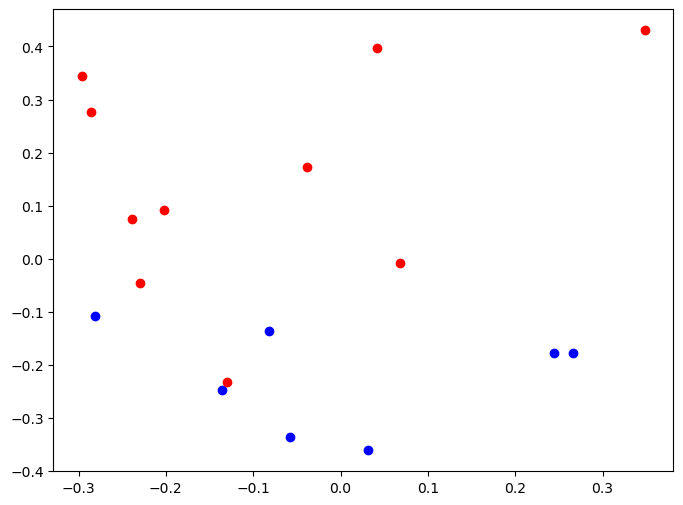

In [32]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot the predicted clusters
plt.figure(figsize=(8, 6))
colors = ['blue', 'red']  # Define colors for each cluster
for i in range(k):
    plt.scatter(X_pca[y_pred == i, 0], X_pca[y_pred == i, 1], c=colors[i], label=f'Cluster {i}')
plt.title('Predicted Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
